In [24]:
import string,re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import joblib

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import (ConfusionMatrixDisplay,classification_report,accuracy_score,
                            precision_score,roc_auc_score)

pd.set_option('display.max_colwidth', 400)
pd.set_option('display.max_rows', 1000) 

In [2]:
#Import fastai latest dataset
df_fastai = pd.read_csv("dataset/vax_tweets_fastai_cleaned.csv")

In [3]:
#Import latest dataset
df_LR = pd.read_pickle('dataset/vax_tweets_sentiment_latest_labeled.pkl')

In [4]:
df_fastai.sample(10)

,orig_text,sentiment,cleaned_text,user_name,date,hashtags
43363,induces antibodies lasting for at least 6 months. #,neutral,induces antibodies lasting least months,Mahmoud Halablab,2021-04-09,"['Moderna', 'Covid_19', 'vaccine', 'كورونا']"
154368,"BOOSTED for Grampie, Papa, Bill, Iris, every human I come in contact with at work, for Jason and every guy and gal",neutral,boosted grampie papa bill iris human come contact work jason guy gal,Daisy Ruth,2021-11-05,NaN
118390,Go team Yahoo News: Moderna may be superior to Pfizer against Delta; breakthrough odds rise with time.\n,neutral,go team yahoo news moderna may superior pfizer against delta breakthrough odds rise time,Elastep,2021-08-10,['Moderna']
157043,Stil not allowed,neutral,stil not allowed,☯️ Antonio Tiggelaar 🏞️,2021-11-11,['sputnikV']
30167,The vaccine only exists because of years of funding leading up to 2020. A large chunck was ODA f,neutral,vaccine only exists because years funding leading up large chunck oda,Adam John Ritchie,2021-03-20,['OxfordAstraZeneca']
136098,"Who else thinks Spikevax sounds like something youd order at Starbucks\nUm yes, can I get a Venti half sweet, dou",negative,else thinks spikevax sounds like something would order starbucks um yes can get venti half sweet dou,✨Mary✨,2021-09-16,NaN
35588,"Yes, the very same David Livermore, \nmicrobiologist from the University of East Anglia",neutral,yes very same david livermore microbiologist from university east anglia,The Conspiracy Report,2021-03-27,NaN
115660,vaccines production in India to go fully on stream in September: RDIF\n\n,neutral,vaccines production india go fully stream september rdif,Gaon Connection English,2021-08-03,"['SputnikV', 'COVID19', 'Sputnik']"
45741,The Ministry of Health and Population of confirmed that Egypt will receive the,neutral,ministry health population confirmed egypt receive,China Economy,2021-04-08,"['Egypt', 'China', 'Sinopharm', 'vaccines']"
67391,Scientists confirmed that neutralizing antibodies are key to protection against COVID-19 and their level after vacc,neutral,scientists confirmed neutralizing antibodies key protection against covid level after vacc,Buren Chen,2021-05-19,NaN


In [5]:
df_LR.sample(10)

,orig_text,cleaned_text,user_name,date,hashtags,sentiment
48237,I have added a new channel 18-44 (COVAXIN Only):\nhttps://t.co/HTJstdAVOQ\n\n(1/2)\n\n#GetVaccinated #COVID19Vaccine… https://t.co/PNIQFZJrDH,added new channel covaxin only,Mumbai Vaccine Slots,2021-05-30,"['GetVaccinated', 'COVID19Vaccine']",neutral
94021,#Delhi is getting better \n#MaskUp #vaccination \n#COVID19 #Covaxin https://t.co/5NM30fHDzG,getting better,Mayank Arya 🇮🇳🇮🇳,2021-08-11,"['Delhi', 'MaskUp', 'vaccination', 'COVID19', 'Covaxin']",positive
76376,2 vaccine doses gave 95% protection from death against Covid-19's Delta variant: Centre | Latest News India - Hindu… https://t.co/fa3Fz28H61,vaccine doses gave protection from death against covid delta variant centre latest news india hindu,FirstNameJohn,2021-07-16,NaN,neutral
26775,"Sputnik's India plans: Aim to to producer 50M/month in partnership with 5 manufacturers, some of whom are manufactu… https://t.co/WEcZ6q7Sek",sputniks india plans aim producer mmonth partnership manufacturers some manufactu,Tanvi Shukla,2021-04-13,NaN,neutral
108175,China’s vaccine producer #Sinovac is fulfilling demand from Singapore for inactivated COVID-19 vaccines with an add… https://t.co/DwuQFmixmN,chinas vaccine producer fulfilling demand from singapore inactivated covid vaccines add,China Perspective,2021-09-15,['Sinovac'],neutral
48926,Indian Immunologicals Limited (IIL) to start production of drug substance for #Covaxin under Mission #COVIDSuraksha… https://t.co/tZPCGxqdGl,indian immunologicals limited iil start production drug substance under mission,Pankaj Srivastava,2021-05-28,"['Covaxin', 'COVIDSuraksha']",neutral
24418,@sagar_denny @SrihpsdV @ShamikaRavi @WHO @sputnikvaccine @TheLancet Problem is that mass produced #sputnikv is diff… https://t.co/U2T5V1roD8,problem mass produced different,Gregor Makarian,2021-04-12,['sputnikv'],negative
50461,#Serbia's President thanks #Russia for new batch of #SputnikV vaccine https://t.co/FPUamO8fhB,president thanks new batch vaccine,Olga Semenova,2021-05-28,"['Serbia', 'Russia', 'SputnikV']",positive
102979,@business You don't SAY....Hmm \n#COVID19\n#Moderna \n#blackgoo https://t.co/rfH3LmgL30,not hmm,Christine Smith,2021-09-01,"['COVID19', 'Moderna', 'blackgoo']",neutral
34233,"BREAKING: #Serbia starts #SputnikV production! \n\nRDIF &amp; Institute of Virology, Vaccines and Sera “Torlak” join forc… https://t.co/TtQkX7B5uy",breaking starts production rdif institute virology vaccines sera torlak join forc,Sputnik V,2021-04-14,"['Serbia', 'SputnikV']",neutral


In [6]:
df_fastai.isnull().sum()

orig_text           0
sentiment           0
cleaned_text        0
user_name           1
date                0
hashtags        34064
dtype: int64

In [7]:
df_LR.isnull().sum()

orig_text           0
cleaned_text        0
user_name           1
date                0
hashtags        28188
sentiment           0
dtype: int64

In [8]:
df_fastai.shape

(162233, 6)

In [9]:
df_LR.shape

(135298, 6)

In [10]:
df_fastai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162233 entries, 0 to 162232
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   orig_text     162233 non-null  object
 1   sentiment     162233 non-null  object
 2   cleaned_text  162233 non-null  object
 3   user_name     162232 non-null  object
 4   date          162233 non-null  object
 5   hashtags      128169 non-null  object
dtypes: object(6)
memory usage: 7.4+ MB


In [11]:
df_LR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135298 entries, 0 to 135297
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   orig_text     135298 non-null  object
 1   cleaned_text  135298 non-null  object
 2   user_name     135297 non-null  object
 3   date          135298 non-null  object
 4   hashtags      107110 non-null  object
 5   sentiment     135298 non-null  object
dtypes: object(6)
memory usage: 6.2+ MB


In [12]:
#Rearrange column
df_fastai = df_fastai[['orig_text','cleaned_text','sentiment','user_name','date','hashtags']]
df_LR = df_LR[['orig_text','cleaned_text','sentiment','user_name','date','hashtags']]

In [13]:
df_fastai['sentiment'].value_counts()

neutral     104595
positive     29945
negative     27693
Name: sentiment, dtype: int64

In [14]:
df_LR['sentiment'].value_counts()

neutral     91544
positive    24885
negative    18869
Name: sentiment, dtype: int64

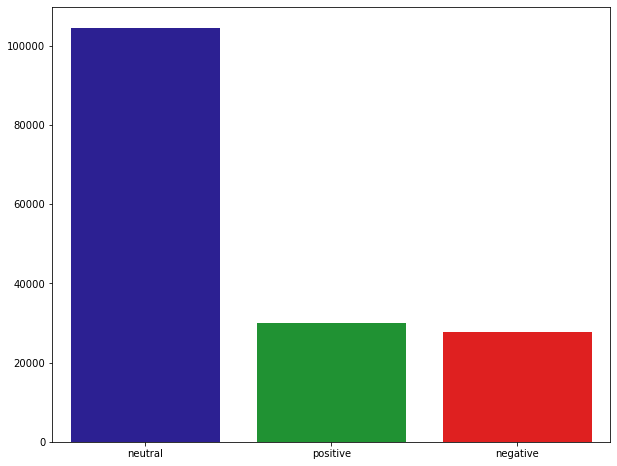

In [16]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x=df_fastai['sentiment'],palette=(['#1d0da5', '#0da526','r']),
                  order = df_fastai['sentiment'].value_counts().index)

ax.set(xlabel=None,ylabel=None)

plt.show()

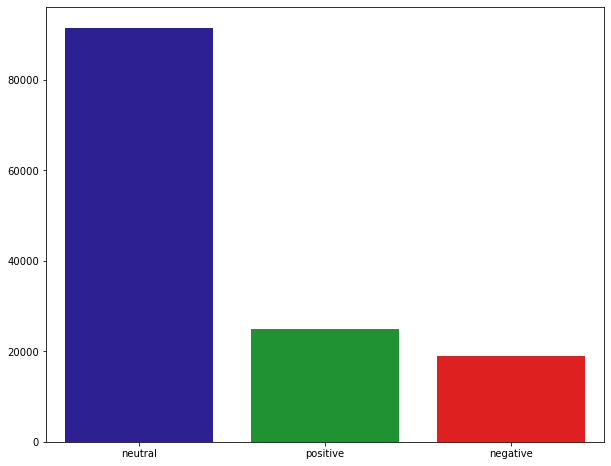

In [17]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x=df_LR['sentiment'],palette=(['#1d0da5', '#0da526','r']),
                   order = df_LR['sentiment'].value_counts().index)

ax.set(xlabel=None,ylabel=None)

plt.show()

In [37]:
#Split dataset into training and test set

X_test = df_fastai['cleaned_text']
y_test = df_fastai['sentiment']

In [41]:
#Classification performance evaluation

def evaluate(model,index_text):
    predict = model.predict(X_test)
    
    class_report = classification_report(y_test,predict,output_dict=True)
    accuracy = class_report['accuracy']
    precision = class_report['weighted avg']['precision']
    recall = class_report['weighted avg']['recall']
    f1 = class_report['weighted avg']['f1-score']
    
    print("\n"+index_text+"\n")
    print(classification_report(y_test,predict))
    
    #print("\nROC AUC: " + str(roc_auc))
    
    print("\nConfusion Matrix:\n")
    ConfusionMatrixDisplay.from_predictions(y_test, predict)
    plt.show()
    
    return pd.DataFrame(
        data={"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1-Score": f1},
        index=[index_text]
    )

In [39]:
LR_model = joblib.load('./modelling/model/LR_model.joblib')
svm_model = joblib.load('./modelling/model/svm_model.joblib')
nb_model = joblib.load('./modelling/model/nb_model.joblib')
rf_model = joblib.load('./modelling/model/rf_model.joblib')


LogisticRegression

              precision    recall  f1-score   support

    negative       0.62      0.52      0.56     27693
     neutral       0.82      0.85      0.84    104595
    positive       0.71      0.73      0.72     29945

    accuracy                           0.77    162233
   macro avg       0.72      0.70      0.71    162233
weighted avg       0.77      0.77      0.77    162233


Confusion Matrix:



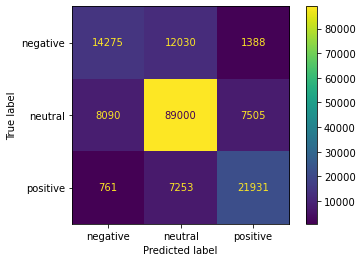


LinearSVC

              precision    recall  f1-score   support

    negative       0.64      0.48      0.55     27693
     neutral       0.82      0.86      0.84    104595
    positive       0.70      0.73      0.71     29945

    accuracy                           0.77    162233
   macro avg       0.72      0.69      0.70    162233
weighted avg       0.76      0.77      0.77    162233


Confusion Matrix:



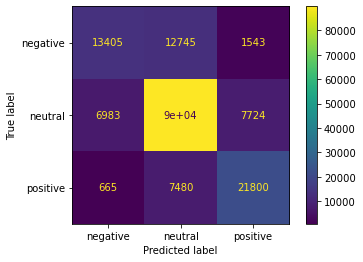


MultinomialNB

              precision    recall  f1-score   support

    negative       0.71      0.26      0.39     27693
     neutral       0.74      0.94      0.83    104595
    positive       0.79      0.50      0.62     29945

    accuracy                           0.75    162233
   macro avg       0.75      0.57      0.61    162233
weighted avg       0.75      0.75      0.72    162233


Confusion Matrix:



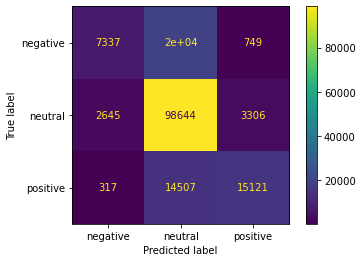


RandomForest

              precision    recall  f1-score   support

    negative       0.70      0.33      0.45     27693
     neutral       0.79      0.91      0.84    104595
    positive       0.74      0.68      0.71     29945

    accuracy                           0.77    162233
   macro avg       0.74      0.64      0.67    162233
weighted avg       0.76      0.77      0.75    162233


Confusion Matrix:



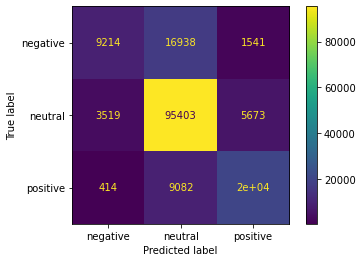

In [55]:
eval_result = pd.DataFrame()

for i in [LR_model,svm_model,nb_model,rf_model]:
    listAlgo = re.compile (r'LogisticRegression|LinearSVC|MultinomialNB|RandomForest')
    algo = listAlgo.search(str(i))
    #print(mo1.group())
    eval_result = pd.concat([eval_result,evaluate(i,algo.group())])

In [56]:
eval_result

,Accuracy,Precision,Recall,F1-Score
LogisticRegression,0.771767,0.766604,0.771767,0.768215
LinearSVC,0.771070,0.764512,0.771070,0.765615
MultinomialNB,0.746470,0.746205,0.746470,0.715462
RandomForest,0.770904,0.762641,0.770904,0.752342
